# CS122:  HW 6.2 (Pandas and Case Study)

### Do not remove any portion of the starter codes unless you get the permissions.

# (15pt) Q1: plot the trend of rainfall changes

* Repeat the procedue used in lecture "week.14.case.study.ipynb" to plot the trend of rainfall cahnges.
* However, you do not need to start from the scratch. 
* Instead you can use the provided database "weather_data.db" that contains data about all the weather data including rainfall measured by station USC00047916 which is the station closest to San Jose with all the data from 
1893 to 2020.

    * For your reference, the raw data in plain text is contained in file 
weather_Station(station_id='USC00047916', latitude=36.9878, longitude=-121.9994, elevation=21.3, state='CA', name='SANTA CRUZ', start=1893, end=2020).txt.


* You are reqired to Display the trend of the rainfall change from 1893 to 2020. 

* Your program must contain the database commands.
    * No credit will be given if the program does not extract the data from the provided data.

* The expectd results is shown below.


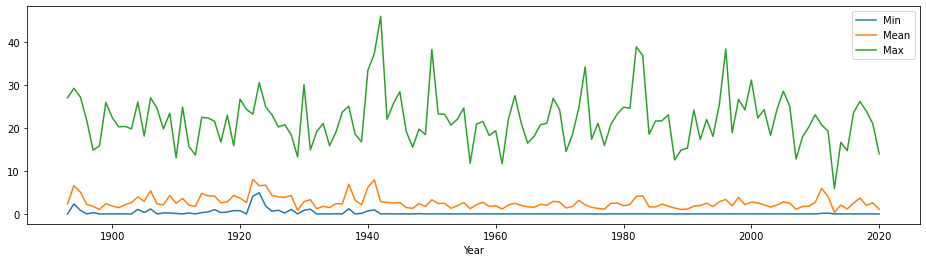

In [4]:
# xxx Fill in your codes in a single cell below.
import sqlite3

conn = sqlite3.connect("weather_data.db")
cursor = conn.cursor()

cmd = """select * from weather where element='PRCP' order by year, month""" # Change TMAX to PRCP
cursor.execute(cmd)
prcp_data = cursor.fetchall()
conn.close() # We are done using DB
prcp_data[:5]

prcp_data = [x for x in prcp_data if x[3] == 'PRCP']

import pandas as pd
%matplotlib inline

a = ['Station', 'Year', 'Month', 'Element', 'Max', 'Min', 'Mean', 'Days']

prcp_df = pd.DataFrame(prcp_data, columns=a)


# select Year, Min, Max, Mean columns, group by year, average and line plot
a = ['Year','Min', 'Mean', 'Max']
prcp_df[a].groupby('Year').mean().plot( kind='line', figsize=(16, 4))

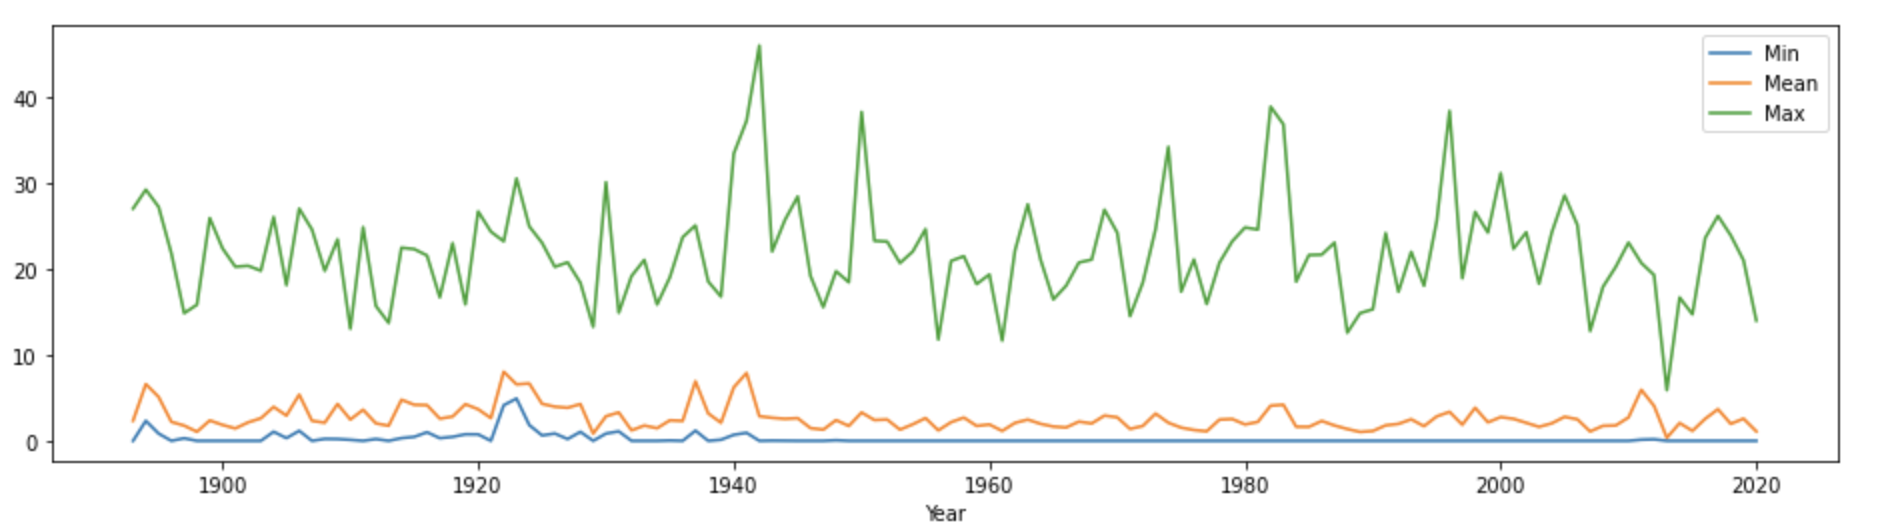

In [2]:
# The expecte output files
from IPython.display import Image
Image(filename='san.jose.railfall.png')

## Reference for the following questions
* https://www.w3resource.com/python-exercises/pandas/index-dataframe.php

### (5pt) Q2:
Write a Pandas program to select the rows where the number of attempts in the examination is between  2 and 3 (inclusive) and qualify is yes.


In [3]:
import pandas as pd
import numpy as np

exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts' : [4, 3, 2, 3, 2, 3, 5, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


#xxx fill in your codes below
df = pd.DataFrame(exam_data , index=labels)
df = df.loc[(df['attempts'] <= 3) & (df['attempts'] >= 2) & (df['qualify'] == 'yes')]
print(df)

        name  score  attempts qualify
c  Katherine   16.5         2     yes
f    Michael   20.0         3     yes


### (5pt) Q3:
Write a Pandas program to select the rows where the score is missing or the qualify is no.


In [4]:
import pandas as pd
import numpy as np

exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts' : [4, 3, 2, 3, 2, 3, 5, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


#xxx fill in your codes below
df = pd.DataFrame(exam_data , index=labels)
df = df.loc[(df['score'].isnull()) | (df['qualify'] == 'no')]
print(df)

    name  score  attempts qualify
b   Dima    9.0         3      no
d  James    NaN         3      no
e  Emily    9.0         2      no
h  Laura    NaN         1      no
i  Kevin    8.0         2      no


### (3pt) Q4: 
Write a Pandas program to append a new row 'k' to DataFrame with given values for each column. 

Values for each column will be:
name : ‘Suresh’, score: 15.5, attempts: 1, qualify: ‘yes’, label: ‘k’


In [5]:
import pandas as pd
import numpy as np
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)

#xxx fill in your codes below
print("\nAppend a new row:")
df.loc['k'] = ['Suresh', 15.5, 1, 'yes']
print("Print all records after insert a new record:")
print(df)


Append a new row:
Print all records after insert a new record:
        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes
d      James    NaN         3      no
e      Emily    9.0         2      no
f    Michael   20.0         3     yes
g    Matthew   14.5         1     yes
h      Laura    NaN         1      no
i      Kevin    8.0         2      no
j      Jonas   19.0         1     yes
k     Suresh   15.5         1     yes


### (3pt) Q5: 
Continue the previous question. Now delete the new row and return the original data frame

In [6]:
#xxx fill in your codes below
print("\nDelete the new row and return the original data frame:")
df = df.drop('k')
print(df)


Delete the new row and return the original data frame:
        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes
d      James    NaN         3      no
e      Emily    9.0         2      no
f    Michael   20.0         3     yes
g    Matthew   14.5         1     yes
h      Laura    NaN         1      no
i      Kevin    8.0         2      no
j      Jonas   19.0         1     yes
